In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets import SineCosineDataset
from tiny.utils import visualize_point_cloud
from tiny import Diffusion, PointCloudDDPM, PointCloudDiffusionTrainer, UnconditionalPointCloudDiT

In [3]:
dataset = SineCosineDataset(type="both")

In [4]:
dataset[0]

{'data': tensor([[-3.1416e+00,  8.7423e-08],
         [-3.0419e+00, -9.9568e-02],
         [-2.9421e+00, -1.9815e-01],
         [-2.8424e+00, -2.9476e-01],
         [-2.7427e+00, -3.8843e-01],
         [-2.6429e+00, -4.7825e-01],
         [-2.5432e+00, -5.6332e-01],
         [-2.4435e+00, -6.4279e-01],
         [-2.3437e+00, -7.1587e-01],
         [-2.2440e+00, -7.8183e-01],
         [-2.1443e+00, -8.4003e-01],
         [-2.0445e+00, -8.8987e-01],
         [-1.9448e+00, -9.3087e-01],
         [-1.8451e+00, -9.6262e-01],
         [-1.7453e+00, -9.8481e-01],
         [-1.6456e+00, -9.9720e-01],
         [-1.5459e+00, -9.9969e-01],
         [-1.4461e+00, -9.9224e-01],
         [-1.3464e+00, -9.7493e-01],
         [-1.2467e+00, -9.4793e-01],
         [-1.1469e+00, -9.1151e-01],
         [-1.0472e+00, -8.6603e-01],
         [-9.4746e-01, -8.1194e-01],
         [-8.4773e-01, -7.4978e-01],
         [-7.4800e-01, -6.8017e-01],
         [-6.4827e-01, -6.0380e-01],
         [-5.4853e-01, -5.2144

In [5]:
diffusion = Diffusion(schedule_type="cosine", num_timesteps=250, learn_sigma=False)
dit = UnconditionalPointCloudDiT(input_size=64, in_channels=2, depth=4, num_heads=4, hidden_size=128)
ddpm = PointCloudDDPM(dit, diffusion)

In [6]:
dataloader = DataLoader(dataset, collate_fn=dataset.collate, batch_size=1)

In [7]:
trainer = PointCloudDiffusionTrainer(
    ddpm,
    dataloader,
    num_epochs=1000,
    lr=1e-5
)

In [8]:
trainer.train()

100%|██████████| 2000/2000 [00:18<00:00, 110.79it/s, loss=0.0968]


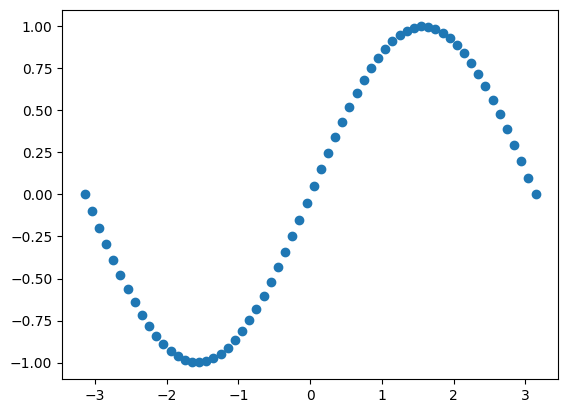

In [9]:
visualize_point_cloud(dataset[0]["data"])